# The Sparks Foundation-GRIP-Data Science and Business Analytics-August'2021
### Task 2: Prediction using Unsupervised ML
### Author: Saifur Rahman Shatil

#### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#### Importing Dataset

In [27]:
path= "../input/iris/Iris.csv"
data= pd.read_csv(path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
print('Total Species: ',data.Species.nunique())
print(data.Species.unique())

Total Species:  3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
y=data.Species

In [30]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_data= encoder.fit_transform(y)

In [32]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
# Drop Id and Species as they won't be necessary in clustering
data.drop(['Id','Species'],axis=1,inplace=True)

In [34]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
data.shape

(150, 4)

In [36]:
# selecting features for clustering
x= data.iloc[:,[0,1,2,3]].values # for all rows select col values

#### Elbow method to find optimum number of clusters

In [37]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


#### Ploting to show the result of elbow mdthod

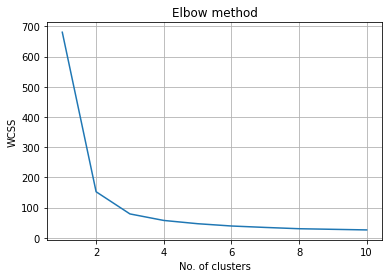

In [38]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [39]:
for i in range(0,10):
    print("{} : {}".format(i,wcss[i]))

0 : 680.8243999999996
1 : 152.36870647733915
2 : 78.94084142614601
3 : 57.34540931571815
4 : 46.535582051282034
5 : 38.93873974358975
6 : 34.190687924796634
7 : 29.90537429982511
8 : 27.927882157034986
9 : 25.955497086247092


The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From the graph we can see the value is 3

#### Model Training

In [40]:
kmeans= KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
y= kmeans.fit_predict(x)

#### Visualizing the clusters

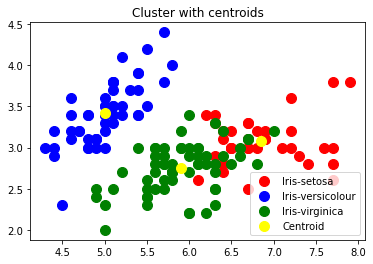

In [41]:
# Visualizing Clusters
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='r',label = 'Iris-setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='b',label= 'Iris-versicolour')
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='g',label= 'Iris-virginica')

# Visualizing Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')
plt.title("Cluster with centroids")
plt.legend()
plt.show()

##### Conclusion

Successfully classified 3 types of species group in the dataset using K Means Clustering 